In [1]:
!pip install pandas
import pandas as pd

Defaulting to user installation because normal site-packages is not writeable


In [3]:
df = pd.read_csv("/home/aa/kuBig2025/ml_dl_python/data/perch_csv_data.csv")

In [6]:
print(df.head())
print(df.describe())
perch_full = df.to_numpy()
print(perch_full.shape)

   length   height   width
0     8.4     2.11    1.41
1    13.7     3.53    2.00
2    15.0     3.82    2.43
3    16.2     4.59    2.63
4    17.4     4.59    2.94
          length     height      width
count  56.000000  56.000000  56.000000
mean   27.892857   7.862143   4.745536
std     9.021668   2.878343   1.775006
min     8.400000   2.110000   1.410000
25%    21.825000   5.690000   3.520000
50%    25.300000   6.920000   4.155000
75%    36.625000  10.850000   6.450000
max    44.000000  12.800000   8.140000
(56, 3)


In [ ]:
import numpy as np

perch_weight = np.array(
    [
        5.9,
        32.0,
        40.0,
        51.5,
        70.0,
        100.0,
        78.0,
        80.0,
        85.0,
        85.0,
        110.0,
        115.0,
        125.0,
        130.0,
        120.0,
        120.0,
        130.0,
        135.0,
        110.0,
        130.0,
        150.0,
        145.0,
        150.0,
        170.0,
        225.0,
        145.0,
        188.0,
        180.0,
        197.0,
        218.0,
        300.0,
        260.0,
        265.0,
        250.0,
        250.0,
        300.0,
        320.0,
        514.0,
        556.0,
        840.0,
        685.0,
        700.0,
        700.0,
        690.0,
        900.0,
        650.0,
        820.0,
        850.0,
        900.0,
        1015.0,
        820.0,
        1100.0,
        1000.0,
        1100.0,
        1000.0,
        1000.0,
    ]
)

In [8]:
print(perch_weight.shape)

(56,)


In [11]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, test_size=0.2, random_state=42
)
print(train_input.shape, train_target.shape, test_input.shape, test_target.shape)

(44, 3) (44,) (12, 3) (12,)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


In [13]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [17]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(44, 9)


In [18]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [19]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9900974417605037
0.9766805886149246


In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

StandardScaler()

In [22]:
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)
print(ss.mean_)
print(ss.scale_)

[ 28.40909091   8.04363636   4.81363636 879.83       252.10329545
 150.91363636  72.58426818  43.43196591  26.09333636]
[  8.52956937   2.8078786    1.70945644 513.34973328 157.26882189
  94.41389072  48.41267454  29.11884931  17.7443732 ]


In [24]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9857357924452941
0.9870467744725252


In [26]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

In [27]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

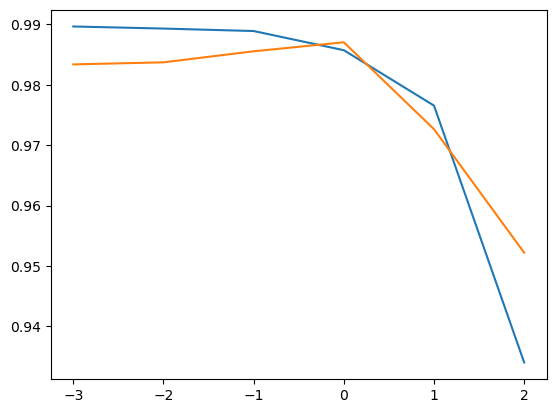

In [28]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [29]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9867183467259742
0.9880327396909515


In [ ]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/home/aa/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.920e+04, tolerance: 5.214e+02
  model = cd_fast.enet_coordinate_descent(
/home/aa/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.711e+04, tolerance: 5.214e+02
  model = cd_fast.enet_coordinate_descent(
/home/aa/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.570e+03, to

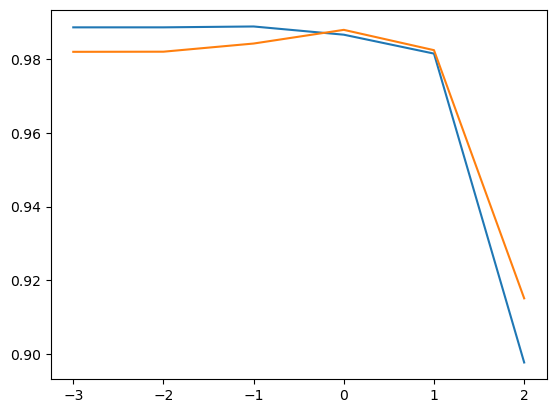

In [31]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()